In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from utils.plot_utils import smooth


In [2]:
def rescale(multiplier_min, value, default_value=0.4):
    range_min = np.asarray(default_value * multiplier_min)
    range_max = np.asarray(default_value * 2)
    rescaled_value = range_min + (range_max - range_min) * value
    return np.around(rescaled_value, 2)
    

ErgoPushRandomizedEnv-Headless-v0_sampling.npy
(1000000,)
[]
[]


/home/sharath/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


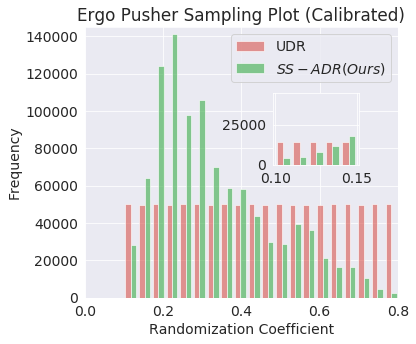

In [9]:
# Set the font size
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

font = {'family' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

# Set the style
sns.set_style("darkgrid")
PLOTCOLORS = ['hotpink', 'darkolivegreen', 'hotpink', 'blue'] # TODO: Chnage colors later. 
range_min = [0.25, 0.05]
less_than = [0.15, 0.1]
colors = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]]
variants = ['uniform', 'ssadr']
mode = ['calibrated', 'uncalibrated']
envs_calibrated = ['uniform_sampling_0.1_1.npy', 'ErgoPushRandomizedEnv-Headless-v0_sampling.npy']
envs_uncalibrated = ['uniform_sampling_0.02_2.npy', 'ErgoPushImpossibleEnv-Headless-v0_sampling.npy']
env_type = ['Ergo Pusher Sampling Plot (Calibrated)', 'Ergo Pusher Sampling Plot (Uncalibrated)'] # Change labels. 
labels = ['UDR', '$SS-ADR (Ours)$']
names = ['randomized.png', 'impossible.png']
t = 0
num=0

# for num in range(1):
fig, ax = plt.subplots(figsize=[6, 5])
y_ticks=[]
for i in range(2):
    if variants[i] == 'ssadr':
        
        if mode[num] == 'calibrated':
            print(envs_calibrated[i])
            values = np.load(os.getcwd() + '/{}'.format(envs_calibrated[i]))
        else:
            values = np.load(os.getcwd() + '/{}'.format(envs_uncalibrated[i]))
        multipliers = [0.0,0.2,0.4,0.6, 0.8, 1.0]
        vals = np.asarray(values)
    #     vals = np.reshape(vals, (-1, 1))
        vals = rescale(range_min[num], vals[4, :int(1e6)])
        print(vals.shape)
    #     vals = np.asarray(vals).squeeze(1)

    else:
        if mode[num] == 'calibrated':
            vals = np.load(os.getcwd() + '/{}'.format(envs_calibrated[i])).squeeze(1)
        else:
            vals = np.load(os.getcwd() + '/{}'.format(envs_uncalibrated[i])).squeeze(1)
    bins = 20
    y_ticks.append(vals)
entries, edges, _ = ax.hist(y_ticks, bins=20,  alpha=0.6, label=labels, color=colors)
ax.set_ylabel('Frequency')
ax.set_xlabel('Randomization Coefficient')

left, bottom, width, height = [0.65, 0.52, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
zoom_y = []
count = 0
for y in y_ticks:
   print(y[ np.where(y <0.1)])
   zoom_y.append(y[ np.where(y <less_than[num])])

ax2.hist(zoom_y, bins=5,  alpha=0.6, color=colors)
# ax2.set_yticks([])
ax2.set_ylim(0, 45000)
ax.legend(loc="upper right")
ax.set_ylim(0, int(1.45e5))
ax.set_xlim(0, 0.8)

ax.set_title('{}'.format(env_type[num]))
plt.tight_layout()
plt.savefig('{}_sampling_plot.png'.format(mode[num]))
plt.show()

(1000000,)


/home/sharath/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


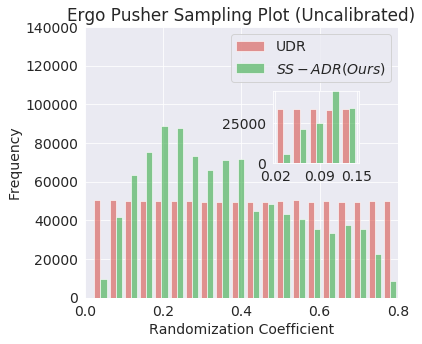

In [10]:
# Veryyyyyyyyyyyyyyyyyyyy ugly way of coding

font = {'family' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

# Set the style
sns.set_style("darkgrid")
PLOTCOLORS = ['hotpink', 'darkolivegreen', 'hotpink', 'blue'] # TODO: Chnage colors later. 
range_min = [0.25, 0.05]
less_than = [0.15, 0.15]
colors = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]]
variants = ['uniform', 'ssadr']
mode = ['calibrated', 'uncalibrated']
envs_calibrated = ['uniform_sampling_0.1_1.npy', 'ErgoPushRandomizedEnv-Headless-v0_sampling.npy']
envs_uncalibrated = ['uniform_sampling_0.02_2.npy', 'ErgoPushImpossibleEnv-Headless-v0_sampling.npy']
env_type = ['Ergo Pusher Sampling Plot (Calibrated)', 'Ergo Pusher Sampling Plot (Uncalibrated)'] # Change labels. 
labels = ['UDR', '$SS-ADR (Ours)$']
names = ['randomized.png', 'impossible.png']
t = 0
num=1

# for num in range(1):
fig, ax = plt.subplots(figsize=[6, 5])
y_ticks=[]
for i in range(2):
    if variants[i] == 'ssadr':
        
        if mode[num] == 'calibrated':
            print(envs_calibrated[i])
            values = np.load(os.getcwd() + '/{}'.format(envs_calibrated[i]))
        else:
            values = np.load(os.getcwd() + '/{}'.format(envs_uncalibrated[i]))
        multipliers = [0.0,0.2,0.4,0.6, 0.8, 1.0]
        vals = np.asarray(values)
    #     vals = np.reshape(vals, (-1, 1))
        vals = rescale(range_min[num], vals[4, :int(1e6)])
        print(vals.shape)
    #     vals = np.asarray(vals).squeeze(1)

    else:
        if mode[num] == 'calibrated':
            vals = np.load(os.getcwd() + '/{}'.format(envs_calibrated[i])).squeeze(1)
        else:
            vals = np.load(os.getcwd() + '/{}'.format(envs_uncalibrated[i])).squeeze(1)
    bins = 20
    y_ticks.append(vals)
entries, edges, _ = ax.hist(y_ticks, bins=20,  alpha=0.6, label=labels, color=colors)
ax.set_ylabel('Frequency')
ax.set_xlabel('Randomization Coefficient')

left, bottom, width, height = [0.65, 0.525, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
zoom_y_ticks = []
count = 0
for y in y_ticks:
   zoom_y_ticks.append(y[np.where(y <less_than[num])])

ax2.hist(zoom_y_ticks, bins=5,  alpha=0.6, color=colors)
ax2.set_ylim(0, 45000)
# ax2.set_yticks([])
ax2.set_xticks([0.02, 0.09, 0.15])
ax.legend(loc="upper right")
ax.set_ylim(0, int(1.4e5))
ax.set_xlim(0, 0.8)

ax.set_title('{}'.format(env_type[num]))
plt.tight_layout()
plt.savefig('{}_sampling_plot.png'.format(mode[num]))
plt.show()

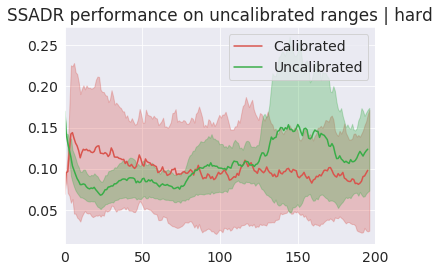

In [16]:
# Learning Curves uncalibrated v/s calibrated
import matplotlib
# Set the font size
font = {'family' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

# Set the style
sns.set_style("darkgrid")
from matplotlib.ticker import FormatStrFormatter
matplotlib.rc('font', **font)
envs = ["ErgoPushRandomizedEnv-Headless-v0", 
        "ErgoPushImpossibleEnv-Headless-v0"]
PLOTCOLORS = ["pale red", "medium green"]
approach = ['Calibrated', 'Uncalibrated']
mode = ['default', 'hard']
lines = [0] * 2
x_gen_labels = np.linspace(0, 199, 199)
i = 1
# xticks = ['0', '5e5','10e5']
fig, ax = plt.subplots()
x_gen_labels = np.linspace(0, 196, 196)
for idx, env in enumerate(envs):         
    learning_curve = np.load(os.getcwd() + '/{}_mean_std_{}_ssadr.npz'.format(envs[idx],
                                                                                mode[i]))
    mean = learning_curve['mean'][:196]
    std = learning_curve['std'][:196]
    g = sns.lineplot(data=mean, color=sns.xkcd_rgb[PLOTCOLORS[idx]], ax=ax, label='{}'.format(approach[idx]))
    plt.fill_between(x_gen_labels, mean + std, mean - std, color=sns.xkcd_rgb[PLOTCOLORS[idx]], alpha=0.3)
#     g.set_xticklabels(xticks)

plt.xlim(0, 200)
plt.legend()
plt.title("SSADR performance on uncalibrated ranges | {}".format(mode[i]), y=1)
plt.savefig('per_seed_{}.png'.format(mode[i]))
plt.tight_layout()
plt.show()

In [ ]:
# Learning Curves
envs = ["ErgoPushRandomizedEnv-Headless-v0", 
        "ErgoPushRandomizedEnv-Headless-v0"]
approach = ['ssadr', 'adr']
mode = ['default', 'hard']
x_gen_labels = np.linspace(0, 199, 199)
i = 1
for idx, env in enumerate(envs):
    
    learning_curve = np.load(os.getcwd() + '/{}_mean_std_{}_{}.npz'.format(env, mode[i], approach[idx]))
    mean, std = learning_curve["mean"][:199], learning_curve["std"][:199]
    plt.plot(x_gen_labels, mean, label=f'{env} | {approach[idx]}',  alpha=0.7)
    plt.fill_between(x_gen_labels, mean + std/2, mean - std/2,  alpha=0.2)
    plt.title(f'{env} | Mode : {mode[i]}')
    plt.xlabel("Number of evaluations | 1 eval per 5000 timesteps")
    plt.ylabel("Average Distance")
    plt.ylim(0, 0.3)
    plt.xlim(0, 200)
    plt.legend()
plt.savefig('{}.png'.format(mode[i]))
plt.show()


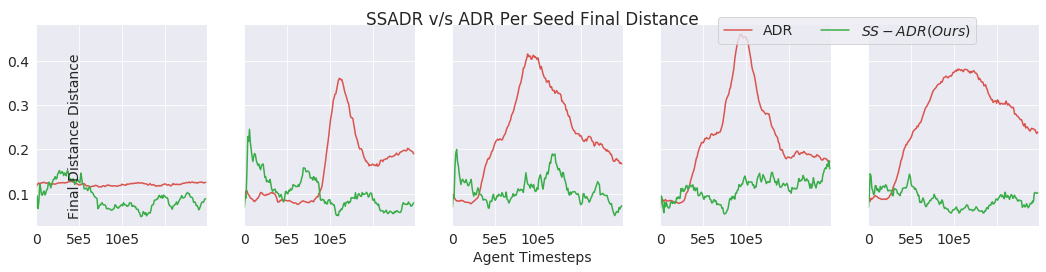

In [23]:
# Learning Curves per seed
import matplotlib
# Set the font size
font = {'family' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

# Set the style
sns.set_style("darkgrid")
from matplotlib.ticker import FormatStrFormatter
matplotlib.rc('font', **font)
envs = ["ErgoPushRandomizedEnv-Headless-v0", 
        "ErgoPushRandomizedEnv-Headless-v0"]
PLOTCOLORS = ["pale red", "medium green"]
approach = ['ADR', '$SS-ADR (Ours)$']
mode = ['default', 'hard']
lines = [0] * 2
x_gen_labels = np.linspace(0, 199, 199)
i = 1
xticks = ['0', '5e5','10e5']
fig, ax = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(15,3.5))
for seed in range(5):
    for idx, env in enumerate(envs):
#     for seed in range(5):
        
        if approach[idx] == 'ADR':
            learning_curve = np.load('/home/sharath/diffsim/{}_final_dist_{}_{}.npy'.format(envs[idx],
                                                                                            mode[i],
                                                                                            seed))[:199]
        else: 
            learning_curve = np.load(os.getcwd() + '/{}_final_dist_{}_{}.npy'.format(envs[idx],
                                                                                    mode[i],
                                                                                    seed))[:199]
        learning_curve = smooth(learning_curve, 20, 'causal')
        g = sns.lineplot(data=learning_curve, color=sns.xkcd_rgb[PLOTCOLORS[idx]], ax=ax[seed], label='{}'.format(approach[idx]))
#         lines[idx] = ax[seed].plot(x_gen_labels, learning_curve, PLOTCOLORS[idx], label='{}'.format(approach[idx]))
        g.set_xticklabels(xticks)
#         ax[seed].tick_params(axis='x')
#         ax[seed].tick_params(axis='y')
    g.legend_.remove()
# plt.xlabel('Number of evaluations | 1 eval per 5000 timesteps')
# plt.ylabel('Final Distance')
plt.xlim(0, 200)
lines = []
labels = []

for k, ax in enumerate(fig.axes):
    if k % 5 == 0:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)
sns.despine()

# fig.legend(lines, labels)
# sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.5})
plt.figlegend( lines, labels, bbox_to_anchor=(0.91, 1.04), ncol=2, labelspacing=0. )

fig.text(0.5, 0.0, 'Agent Timesteps', ha='center')
fig.text(0.07, 0.5, 'Final Distance Distance', va='center', rotation='vertical')
fig.suptitle("SSADR v/s ADR Per Seed Final Distance", y=1)
plt.savefig('per_seed_{}.png'.format(mode[i]))
plt.tight_layout()
plt.show()

In [ ]:
# Generate Random points for UDR
import numpy as np
import matplotlib.pyplot as plt
import os
samplings = 0
gather = []
bc = 0
std = 0
for i in range(1):
    a = np.load(os.getcwd() + '/uniform_sampling_0.02_{}.npy'.format(i))
    gather.append(a)
    y,binEdges = np.histogram(a,bins=20)
    samplings += y
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    bc += bincenters
    std     += np.sqrt(y)
    width      = 0.03
print(bc / 5, samplings)
plt.bar(bincenters, samplings, width=width, color='r', yerr=std)
plt.show()
# plt.hist(a, bins=20, alpha=0.6)
# plt.show()

In [ ]:
import numpy as np
import pylab as plt

data       = np.array(np.random.rand(1000))
y,binEdges = np.histogram(data,bins=10)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05
plt.bar(bincenters, y, width=width, color='r', yerr=menStd)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='y')
n, bins, patches = plt.hist(s, 10, normed=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plottools
# >>>
fig,ax = plt.subplots()
x = np.linspace(0,1,100)
y = 1-x + 0.02*(2*np.random.random(len(x))-1)
ax.plot(x,y)
ax_zoom = plottools.zoom_axes(fig,ax,[0.1,0.2],[0.8,0.9],[0.6,0.9],[0.6,0.9])
ax_zoom.plot(x,y)
plt.show()

In [19]:
import pickle
pickle_in = open("real-results.pk","rb")


In [23]:
import io
fbuf = io.BufferedReader(pickle_in)

In [26]:
fbuf.read(20)

b'\x80\x04\x95+2\x00\x00\x00\x00\x00\x00\x8c\x11pandas.'